# Part 9 of Drawing Ideograms: Labels

This page is primarily based on the following page at the Circos documentation site:



- [9. Labels](????????????)



That page is found as part number 4 of the ??? part ['Drawing Ideograms' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 8 by clicking [here &#8592;](Drawing_ideograms_Part8.ipynb).



----



2 --- Drawing Ideograms
=======================

9. Labels
---------

::: {#menu4}
[[Lesson](/documentation/tutorials/ideograms/labels/lesson){.clean}]{.active}
[Images](/documentation/tutorials/ideograms/labels/images){.normal}
[Configuration](/documentation/tutorials/ideograms/labels/configuration){.normal}
:::

Each ideogram has a label field in the karyotype file

```ini
#
# A name of chromosome used in coordinate files
# B label of chromosome and derived ideograms
#
#     A    B
chr - hs12 12 0 132349534 green
```


This label field defines the text that is shown in the figure. This text
is optional and can be positioned and formatted flexibly.

### ideograms vs chromosomes

Keep the difference between chromosomes and ideograms in mind. The
*chromosome* is the structure on which you define position of data. The
*ideogram* is the visual representation of the chromosome or a region of
a chromosome.

Most of the time, each chromosome will have one ideogram. However, if
you use axis breaks and suppress the display of a region of a
chromosome, a chromosome will have more than one ideogram.

When chromosomes are broken up into multple ideograms, each ideogram is
identified by a tag (e.g. `a b c`). You can have this tag added to the
label using `label_with_tag` as described below.

### fonts

Circos supports True Type and Open Type fonts. These fonts are defined
in the [\<font\>]{.syn-block} block. In all of the tutorials this
definition is included via the `colors_fonts_patterns.conf` file, which
defines [\<fonts\>]{.syn-block}, [\<colors\>]{.syn-block} and
[\<patterns\>]{.syn-block} blocks.

```ini
# circos.conf
<<include colors_fonts_patterns.conf>>
...
```


The [\<font\>]{.syn-block} block is used to associate a font file (.TTF
or .OTF) with a unique name, such as \"normal\", \"bold\", or
\"condensed\". For example,

```ini
light          = fonts/modern/cmunbmr.otf
normal         = fonts/modern/cmunbmr.otf
default        = fonts/modern/cmunbmr.otf
semibold       = fonts/modern/cmunbsr.otf
bold           = fonts/modern/cmunbbx.otf
italic         = fonts/modern/cmunbmo.otf
bolditalic     = fonts/modern/cmunbxo.otf
italicbold     = fonts/modern/cmunbxo.otf
```


To use the font, specify it by using its definition (e.g. light), *not*
the font file name (e.g. `fonts/modern/cmunbmbr.otf`{.syn-include}). If
you specify a font definition that has not been defined, `default` is
used. It\'s a good idea to always have a `default` definition.

### ideogram labels

Ideogram labels are controlled by these parameters within the
[\<ideogram\>]{.syn-block} block.

```ini
<ideogram>
show_label     = yes
label_with_tag = yes
label_font     = light
label_radius   = dims(ideogram,radius_outer) + 0.05r
label_center   = yes
label_size     = 48p
label_color    = grey
label_parallel = yes
label_case     = upper 
label_format   = eval(sprintf("chr%s",var(label)))
...
</ideogram>
```


### label tags

The `label_with_tag` parameter controls whether a tag associated with
the ideogram region is included with the label. Tags are used to
identify ideograms from the same chromosome

```ini
# tags "a" and "b"
chromosomes = hs1[a]:50-75,hs1[b]:100-125
```


### label font

The `label_font` specifies the name of the font (using its label, as
defined in the [\<fonts\>]{.syn-block} block.

### label position

The `label_radius` controls the radial position of the ideogram label.
Here, it is best to put the label relative to the ideogram outer (or
inner) radius. If you would like the label to be centered at this
radius, use `label_center = yes`. A few examples are

```ini
# 50 pixels outside the outer ideogram radius
label_radius = dims(ideogram,radius_outer) + 50p
```


```ini
# 5% of inner radius outside outer ideogram radius
label_radius = dims(ideogram,radius_outer) + 0.05r
```


```ini
# inside ideogram
label_radius = (dims(ideogram,radius_outer)+dims(ideogram,radius_inner))/2
```


```ini
# 100 pixels inside the ideogram radius
label_radius = dims(ideogram,radius_inner) - 100p
```


```ini
# 50 pixels inside the image radius
label_radius = dims(image,radius) - 50p
```


### label orientation

You can make the baseline of the ideogram labels to be parallel to the
circle by using the `label_parallel` parameter within the ideogram
block.

### label case

To override the way the label is displayed, you can force upper or lower
case with `label_case`, which can be set to `upper` or `lower`.

```ini
# ideogram labels will be uppercase
label_case = upper
```


### label format

You can define the format of the label flexibly by using `sprintf`.
Here, the label of the chromosome (e.g. 1) is prefixed with the string
\"chr\".

```ini
label_format = eval(sprintf("chr%s",var(label)))
```


Here are a few other examples of the use of `label_format`. In all cases
`var()` refers to a property of the ideogram, such as `chr` (e.g.
`hs10`) or `label` (e.g. `10`).

```ini
# show labels only for chromosomes 1-5
label_format     = eval( var(chr) =~ /hs[1-5]$/ ? var(label) : "")
```


```ini
# hide label for chromosome hs10
label_format     = eval( var(chr) eq "hs10" ? "" : var(label))
```


In some cases, you may want to simplify the ideogram label. For example,
if all your labels contain the string `ctg.` (e.g. `ctg.123`) and you
want to trim it, use the helper function `replace(str,rx,replace_str)`.

```ini
# replace the string ctg. in the label with empty string (i.e. remove the string)
label_format     = eval( replace(var(label),"ctg.","") )
```


```ini
# use the chromosome name as the label, but replace "hs" with "human "
label_format     = eval( replace(var(chr),"hs","human ") )
```


You can use other properties of the ideogram in the label

```ini
# include length in the label (divided by 1,000,000 and suffixed with "Mb")
label_format     = eval( sprintf("%s %dMb",var(label),var(size)/1e6) )
```


### help with `var()`

For a full list of parameter names that are available for the `var()`
function, use `var(?)`. When Circos parses this it will return (and
quit) a list of parameters with their values.

```ini
# e.g. using
label_format     = eval( sprintf("%s %dMb",var(label),var(?)/1e6) )
```


```ini
# will return
You asked for help in the expression [eval( sprintf("%s %dMb",1,var(?)/1e6) )].
In this expression the arguments marked with * are available for the var() function.
break   HASH
chr * hs1
chr_with_tag * 1
chrlength * 249250622
covers   ARRAY
display_idx * 0
end * 249250621
idx * 0
label * 1
length   HASH
next   HASH
param   HASH
prev   HASH
radius * 1350
radius_inner * 1275
radius_middle * 1312.5
radius_outer * 1350
reverse * 0
scale * 1
set   Set::IntSpan
size * 249250622
start * 0
tag * hs1
thickness * 75
```


For now, the parameters listed as `HASH`, `ARRAY`, or an object (e.g.
`Set::IntSpan`) cannot be polled by `var()`.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/2/9/

/home/jovyan/circos-tutorials-0.67/tutorials/2/9


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.38s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.39s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/2/9
debuggroup summary 0.39s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.39s loading configuration from file circos.conf
debuggroup summary 0.39s found conf file circos.conf
debuggroup summary 0.55s debug will appear for these features: output,summary
debuggroup summary 0.55s bitmap output image ./circos.png
debuggroup summary 0.55s SVG output image ./circos.svg
debuggroup summary 0.55s parsing karyotype and organizing ideograms
debuggroup summary 0.65s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.66s applying global and local scaling
debuggroup summary 0.67s allocating image, colors and brushes
debuggroup summary 2.78s drawing 24 ideograms of total size 3,095,677,436
debuggroup summary 2.78s drawing highlights and ideograms
debuggroup outp

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

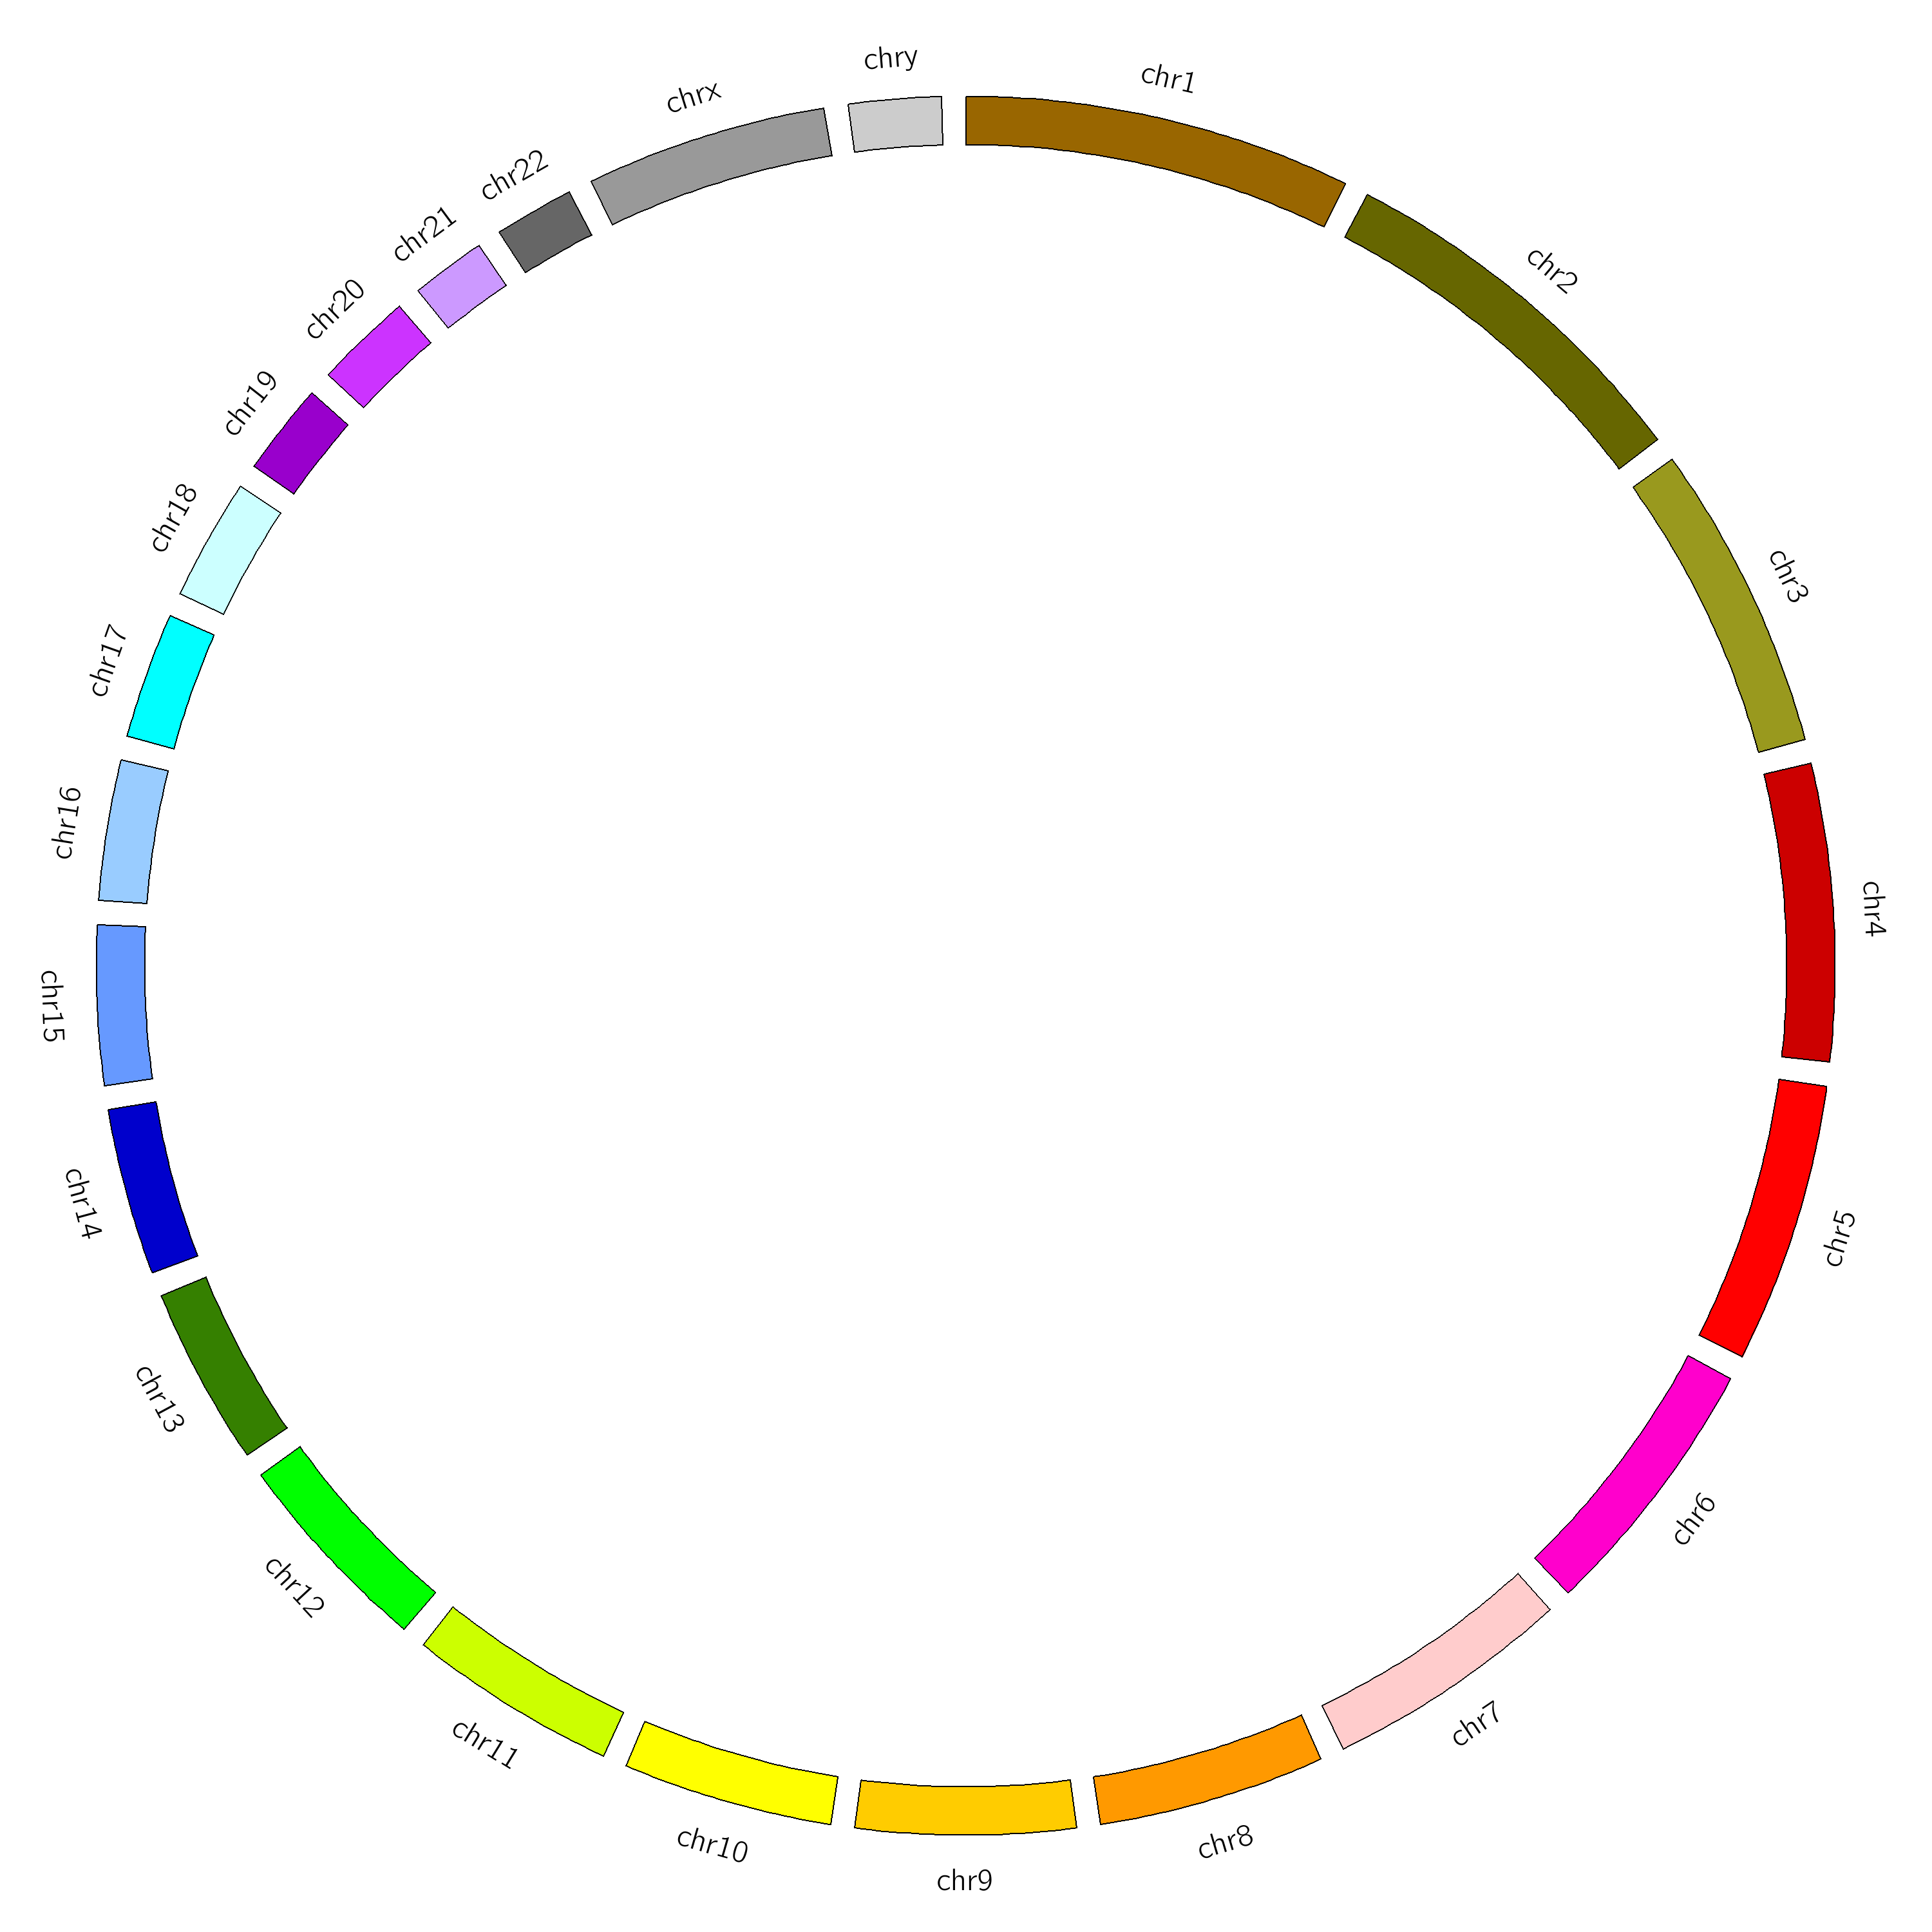

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Drawing Ideograms series by clicking [here &#10145;](Drawing_ideograms_Part10.ipynb).

----